# **Setup**

In [36]:
!python3 --version

from psutil import *
print(f'CPU Core: {cpu_count()}')
print(f'System RAM {virtual_memory()[0]/(1024**3)} GB')

Python 3.11.4


CPU Core: 8
System RAM 8.0 GB


In [37]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
import seaborn as sns
from IPython.display import clear_output
from lifelines.plotting import plot_lifetimes

In [38]:
import os
from zipfile import ZipFile

# **Data Import**

In [39]:
!kaggle datasets download -d blastchar/telco-customer-churn

telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
with ZipFile("telco-customer-churn.zip", "r") as zip_ref:
    # Get list of file names in zip
    list_of_files = zip_ref.namelist()
    print('No. Of Files In Zip File: ',len(list_of_files),'\n')
    print(list_of_files)

No. Of Files In Zip File:  1 

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [41]:
# Extract Zip File Contents In Main Directory
with ZipFile("telco-customer-churn.zip", "r") as zip_ref:
    # Get list of file names in zip
    list_of_files = zip_ref.namelist()

    for file in list_of_files:
        file_content = zip_ref.read(file)
        with open(os.path.basename(file), "wb") as f:
                f.write(file_content)

In [42]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(df.shape)
df.columns

(7043, 21)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Data Pre-Processing**

## **Convert DType Of TotalCharges Column**

In [53]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [54]:
# Convert Data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [55]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


## **Encode Churn Column**

In [58]:
df['Churn'].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [59]:
df['Churn_Enc'] = df['Churn'].apply(lambda x: 1 if x =='Yes' else 0)

In [60]:
df['Churn_Enc'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn_Enc, dtype: int64

## **Check Dataframe Info**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **Check Missing Values**

In [62]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Churn_Enc            0
dtype: int64

## **Impute Missing TotalCharges Values**

In [63]:
df['TotalCharges'].fillna(value=df['TotalCharges'].median(),inplace=True)

In [64]:
df['TotalCharges'].isna().sum()

0

In [75]:
px.histogram(df,'TotalCharges')

# **Data Exploration**

In [ ]:
# Check Missing Data 
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# No. Of Unique Customers 
print('Total Customer IDs: ',len(df['customerID']))
print('Unique Customer IDs: ',len(df['customerID'].unique()))

Total Customer IDs:  7043
Unique Customer IDs:  7043


In [ ]:
# Gender Wise Breakdown of Customer Base
px.histogram(df,'gender')

In [ ]:
# Histogram of Service Tenure 
px.histogram(df,'tenure')   #Unit ?

## **Contract Type**

In [ ]:
# Preferred Service Contract Type
px.histogram(df,'Contract')

## **Monthly Charges**

In [ ]:
# Histogram Of Monthly Charges
px.histogram(df,'MonthlyCharges')

## **Churn**

In [ ]:
# Visualize Churn 
px.histogram(df,'Churn')

## **Phone Service Type**

In [ ]:
# Histogram Of Service
px.histogram(df,'PhoneService')

## **InternetService Type**

In [ ]:
px.histogram(df,'InternetService')

In [78]:
# df.hist('OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV')

## **StreamingTV Type**

In [ ]:
px.histogram(df,'StreamingTV')

## **Partner**

In [118]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [119]:
px.histogram(df,'Partner')

## **Paperless Billing**

In [121]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [122]:
px.histogram(df,'PaperlessBilling')

In [76]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Enc'],
      dtype='object')

# **Data Processing**

## **Overall Survival Curve**

* Kaplan-Meier 

<Axes: xlabel='timeline'>

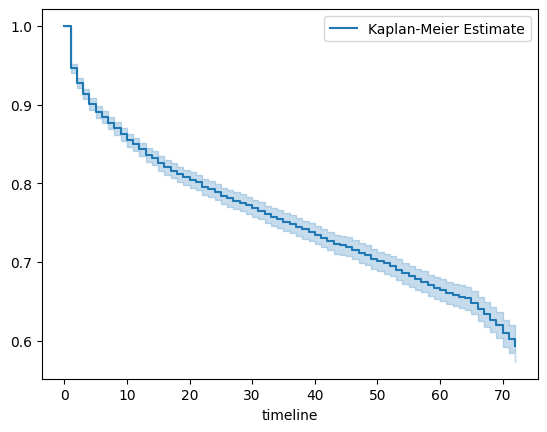

In [79]:
from cProfile import label
from lifelines import KaplanMeierFitter

km = KaplanMeierFitter()
km.fit(df['tenure'],df['Churn_Enc   '],label='Kaplan-Meier Estimate')
km.plot()

## **Survival Curve - Contract Type**

In [85]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: xlabel='timeline'>

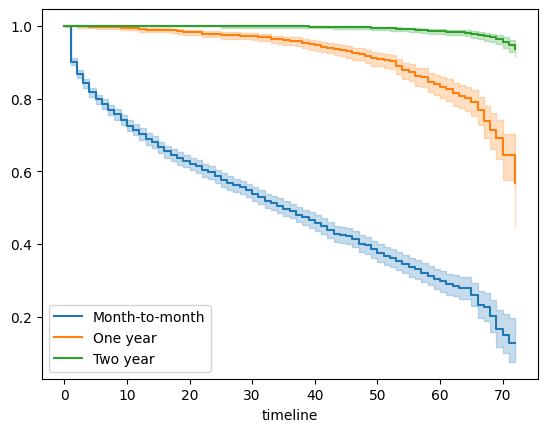

In [107]:
# Month-to-month Contract Type
km.fit(df['tenure'][df['Contract']=='Month-to-month'],
       df['Churn_Enc'][df['Contract']=='Month-to-month'],
       label='Month-to-month')
ax_01 = km.plot()

# One year Contract Type
km.fit(df['tenure'][df['Contract']=='One year'],
       df['Churn_Enc'][df['Contract']=='One year'],
       label='One year')
ax_02 = km.plot(ax=ax_01)

# Two year Contract Type
km.fit(df['tenure'][df['Contract']=='Two year'],
       df['Churn_Enc'][df['Contract']=='Two year'],
       label='Two year')
km.plot(ax=ax_02)

## **Survival Curve - Gender**

In [108]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Enc'],
      dtype='object')

In [109]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

<Axes: xlabel='timeline'>

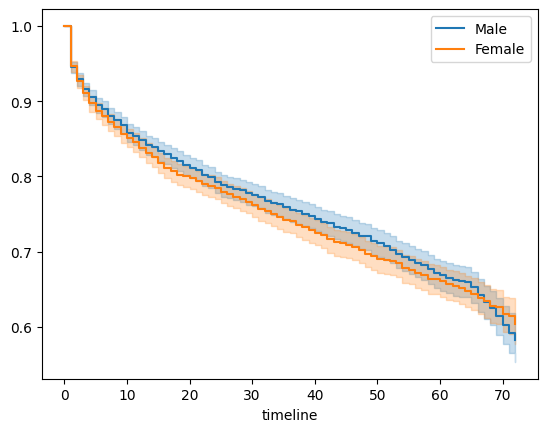

In [110]:
# Male gender Type
km.fit(df['tenure'][df['gender']=='Male'],
       df['Churn_Enc'][df['gender']=='Male'],
       label='Male')
ax_01 = km.plot()

# Female gender Type
km.fit(df['tenure'][df['gender']=='Female'],
       df['Churn_Enc'][df['gender']=='Female'],
       label='Female')
km.plot(ax=ax_01)

## **Survival Curve - InternetService**

In [111]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

<Axes: xlabel='timeline'>

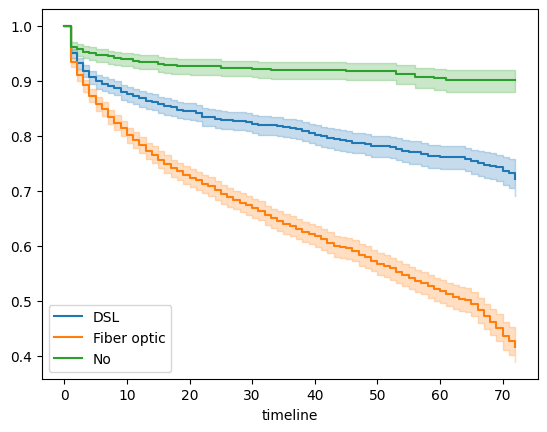

In [112]:
# DSL InternetService Type
km.fit(df['tenure'][df['InternetService']=='DSL'],
       df['Churn_Enc'][df['InternetService']=='DSL'],
       label='DSL')
ax_01 = km.plot()

# Fiber optic InternetService Type
km.fit(df['tenure'][df['InternetService']=='Fiber optic'],
       df['Churn_Enc'][df['InternetService']=='Fiber optic'],
       label='Fiber optic')
ax_02 = km.plot(ax=ax_01)

# No InternetService Type
km.fit(df['tenure'][df['InternetService']=='No'],
       df['Churn_Enc'][df['InternetService']=='No'],
       label='No')
km.plot(ax=ax_02)

## **Survival Curve - StreamingTV Service**

In [113]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Enc'],
      dtype='object')

In [114]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

<Axes: xlabel='timeline'>

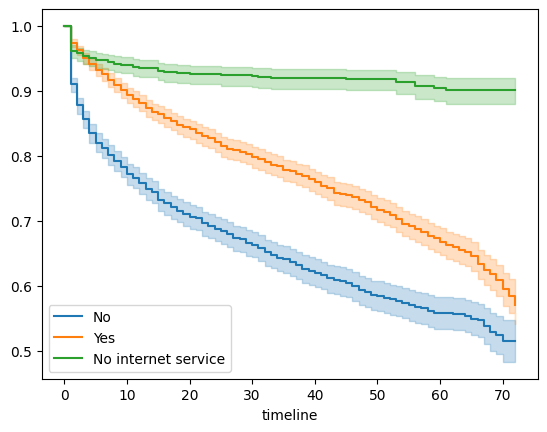

In [115]:
# No StreamingTV Type
km.fit(df['tenure'][df['StreamingTV']=='No'],
       df['Churn_Enc'][df['StreamingTV']=='No'],
       label='No')
ax_01 = km.plot()

# Yes StreamingTV Type
km.fit(df['tenure'][df['StreamingTV']=='Yes'],
       df['Churn_Enc'][df['StreamingTV']=='Yes'],
       label='Yes')
ax_02 = km.plot(ax=ax_01)

# No internet service StreamingTV Type
km.fit(df['tenure'][df['StreamingTV']=='No internet service'],
       df['Churn_Enc'][df['StreamingTV']=='No internet service'],
       label='No internet service')
km.plot(ax=ax_02)

# **Cox Proportional Hazard Model**

* Survival Regression

In [116]:
from lifelines import CoxPHFitter  

In [117]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Enc'],
      dtype='object')

In [153]:
# Data To Be Considered For Hazard Model
df_final = df.loc[:,['tenure','Churn_Enc','gender', 'SeniorCitizen','Partner', 'Dependents','PhoneService',
          # 'MultipleLines','InternetService',
          # 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'MonthlyCharges',
        # 'StreamingMovies',
        # 'Contract', 
        ]]
df_final.head()

,tenure,Churn_Enc,gender,SeniorCitizen,Partner,Dependents,PhoneService,StreamingTV,MonthlyCharges
0,1,0,Female,0,Yes,No,No,No,29.85
1,34,0,Male,0,No,No,Yes,No,56.95
2,2,1,Male,0,No,No,Yes,No,53.85
3,45,0,Male,0,No,No,No,No,42.30
4,2,1,Female,0,No,No,Yes,No,70.70


In [154]:
df_final_Enc = pd.get_dummies(df_final,drop_first=True)
df_final_Enc.head()

,tenure,Churn_Enc,SeniorCitizen,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,0,29.85,0,1,0,0,0,0
1,34,0,0,56.95,1,0,0,1,0,0
2,2,1,0,53.85,1,0,0,1,0,0
3,45,0,0,42.30,1,0,0,0,0,0
4,2,1,0,70.70,0,0,0,1,0,0


In [155]:
cph = CoxPHFitter()
cph.fit(df_final_Enc,'tenure',event_col='Churn_Enc')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Enc'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -15182.39
         time fit was run = 2023-10-18 15:05:38 UTC

---
                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                               
SeniorCitizen                     0.40       1.49       0.06             0.29             0.50                 1.33                 1.66
MonthlyCharges                   -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
gender_Male                      -0.01       0.99       0.05            -0.10             0.08                 0.90                 1.08
Partner_Yes                      -0.81       0.45       0.05            -0.92            -0.70                 0.40                 0.50
Dependents_Yes                   -0.36       0.70       0.07            -0.49            -0.22                 0.61                 0.80
PhoneService_Yes                  0.69       2.00       0.10             0.49             0.90                 1.63                 2.45
StreamingTV_No internet service  -2.10       0.12       0.13            -2.36            -1.84                 0.09                 0.16
StreamingTV_Yes                  -0.19       0.83       0.06            -0.31            -0.07                 0.73                 0.93

                                  cmp to      z      p   -log2(p)
covariate                                                        
SeniorCitizen                       0.00   7.16 <0.005      40.15
MonthlyCharges                      0.00  -6.13 <0.005      30.06
gender_Male                         0.00  -0.23   0.82       0.29
Partner_Yes                         0.00 -14.93 <0.005     164.98
Dependents_Yes                      0.00  -5.21 <0.005      22.37
PhoneService_Yes                    0.00   6.65 <0.005      34.96
StreamingTV_No internet service     0.00 -15.79 <0.005     184.09
StreamingTV_Yes                     0.00  -3.10 <0.005       9.03
---
Concordance = 0.71
Partial AIC = 30380.78
log-likelihood ratio test = 941.30 on 8 df
-log2(p) of ll-ratio test = 654.95

<Axes: xlabel='log(HR) (95% CI)'>

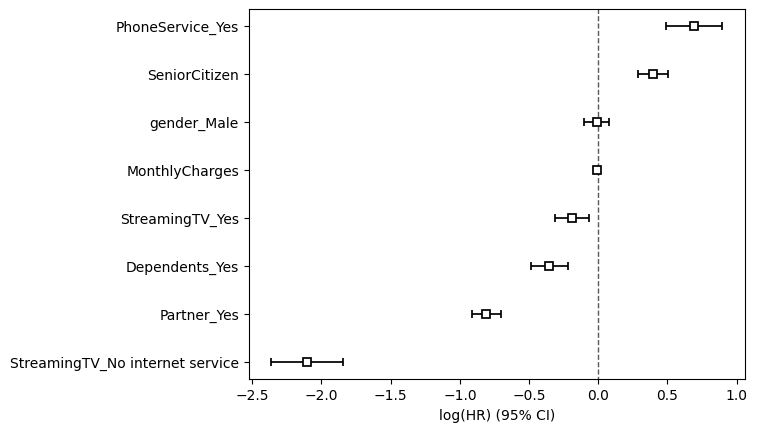

In [156]:
cph.plot()

In [157]:
dir(cph)

['AIC_',
 'AIC_partial_',
 '_ALLOWED_RESIDUALS',
 '_FAST_MEDIAN_PREDICT',
 '_KNOWN_MODEL',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_batch_mode',
 '_censoring_type',
 '_central_values',
 '_check_values_post_fitting',
 '_check_values_pre_fitting',
 '_choose_gradient_calculator',
 '_class_name',
 '_clusters',
 '_compute_baseline_cumulative_hazard',
 '_compute_baseline_hazard',
 '_compute_baseline_hazards',
 '_compute_baseline_survival',
 '_compute_central_values_of_raw_training_data',
 '_compute_confidence_intervals',
 '_compute_delta_beta',
 '_compute_deviance',
 '_compute_martingale',
 '_compute_p_values',
 '_compute_sandwic

## **Predict Survival Plot Of First 10 Customers**

In [160]:
df_final_Enc.iloc[:10,2:]

,SeniorCitizen,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,0,29.85,0,1,0,0,0,0
1,0,56.95,1,0,0,1,0,0
2,0,53.85,1,0,0,1,0,0
3,0,42.30,1,0,0,0,0,0
4,0,70.70,0,0,0,1,0,0
5,0,99.65,0,0,0,1,0,1
6,0,89.10,1,0,1,1,0,1
7,0,29.75,0,0,0,0,0,0
8,0,104.80,0,1,0,1,0,1
9,0,56.15,1,0,1,1,0,0


<Axes: >

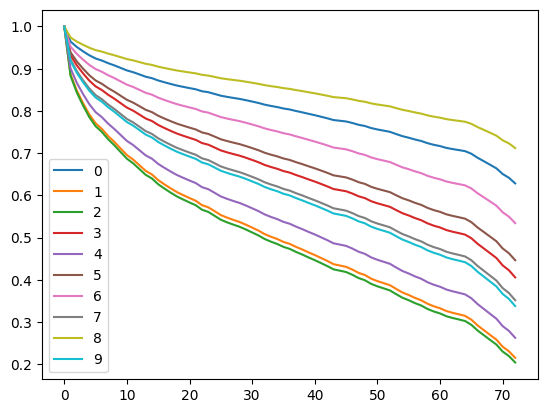

In [167]:
cph.predict_survival_function(df_final_Enc.iloc[:10,2:]).plot()